# Neste modelo, usaremos um conjunto de dados de uma empresa de telecomunicações americana, daremos um nome fictício para a nossa empresa de Orange. Iremos montar dois modelos preditivos, utilizando Rede Neural e Machine Learning. O intuito será predizer se um cliente dará Churn ou não da nossa empresa

# Informações Adicionais

**Cada Linha representa um cliente, cada coluna contém os atributos dos clientes**
1. Gender
    * O gênero do cliente (Female / Male)
2. SeniorCitizen
    * Se o cliente é idoso ou não (1, 0)     
3. Partner
    * Se o cliente é casado ou não (Sim, Não) 
4. Dependents
    * Se o cliente possui dependentes ou não (Yes, No)
5. Tenure
    * Número de meses em que o cliente permaneceu com a empresa 
6. PhoneService
    * Se o cliente possui um serviço de telefonia (Yes, No)
7. MultipleLines
    * Se o cliente possui um serviço de telefonia com múltiplas linhas (Yes, No, No phone service)
8. InternetService
    * Se o cliente possui um serviço de internet (DSL, Fiber optic, No)
9. OnlineSecurity
    * Se o usuário possui um serviço de segurança online, como antivírus por exemplo. (Yes, No, No internet service)
10. OnlineBackup
    * Se o cliente possui um serviço de backup online (Yes, No, No internet service)
11. DeviceProtection
    * Se o cliente possui um serviço de proteção para dispositivos, como celulares, desktops, tablets etc (Yes, No, No internet service)
12. TechSupport
    * Se o cliente possui um serviço de suporte para tecnologia (Yes, No, No internet service)
13. StreamingTV
    * Se o cliente possui um serviço de Streaming na TV (Yes, No, No internet service)
14. StreamingMovies
    * Se o cliente possui um serviço de Streaming para filmes na TV (Yes, No, No internet service)
15. Contract
    * O termo de contrato do cliente (Month-to-month, One year, Two year)
16. PaperlessBilling
    * Isto é um método de envio e gerenciamento de contas e faturas eletronicamente. Se o cliente utiliza PaperlessBilling ou não (Yes, No)
17. PaymentMethod
    * A forma de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
18. MonthlyCharges
    * O valor das cobranças mensais de cada cliente
19. TotalCharges
    * O valor total que já foi cobrado do cliente
20. Churn
    * Se o cliente deu Churn ou não (Yes / No)
  

In [1]:
!pip install sweetviz
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.7 MB/s eta 0:00:00


In [2]:
# Algumas bibliotecas e funcionalidades do Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(16)

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Esta coluna não será útil para a nossa análise, então irei removê-la
df.drop(columns=['customerID'], inplace=True)

In [7]:
df.shape

(7043, 20)

## Vamos analisar algumas informações dos nossos dados. A seguir, veremos se há valores nulos em nossa base e checaremos o tipo dos dados de cada coluna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* Ao visualizar os nossos dados, podemos reparar que a grande maioria dos dados são textuais, o que significa que precisaremos tratar cada um deles, pois modelos de Inteligência Artifical não compreendem textos, apenas números.
* Além disso, encontrei uma inconsistência nos dados: Nossa coluna "TotalCharges" é um valor numérico, entretanto, a coluna está como um objeto, ou seja, dando indícios que podemos possuir valores numéricos e textuais, por isso, precisamos fazer uma alteração

### Convertendo a coluna TotalCharges para um tipo numérico

* Nossa coluna TotalCharges está como object e não numérico, pois há inconsistência nos dados, possuindo valores como " ", por exemplo. Por isso, precisamos realizar alguns tratamentos
* Transformaremos ela para o tipo numérico e removeremos os valores que se tornarem nulos. Se tornarão nulos os valores que não puderem ser transformados para numéricos

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Coluna TotalCharges foi transformada e está no tipo correto, mas agora possuímos valores nulos e precisamos tratá-los

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* Possuímos apenas 11 valores nulos na coluna TotalCharges, então prefiro dropar as linhas do que fazer algum tratamento mais rebuscado

In [11]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [12]:
# Verificando linhas totalmente duplicadas no conjunto de dados
df.duplicated().sum()

22

In [13]:
# Irei dropar todas essas linhas completamente duplicadas
df.drop_duplicates(inplace=True)

### Algumas informações estatísticas das nossas variáveis numéricas

In [14]:
# Utilizei o iloc, pois uma das variáveis era numérica, mas somente de 0 / 1, então não fazia sentido colocar em nossa análise estatística
df.iloc[:,2:].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


* Se visualizarmos os dados acima, podemos ver que até 75% dos dados, há uma distância de 3800. Entretanto, no último quartil (acima dos 75%), esse valor sai de 3800 pra 8600, nos dando indício de que somente uma parcela muito pequena desses clientes possuem contas mais caras, a grande massa está concentrada em valores que estejam entre 18 e 3800

* Podemos visualizar que há uma dispersão muito grande nos dados. Olhando para os valores mínimos e máximos, podemos ver uma diferença muito grande, isto pode ser uma dificuldade para nosso modelo compreender os dados, então faremos uma normalização a seguir.

# EDA (Análise Exploratória de Dados)

In [15]:
green_yellow = '#93DB70'
light_red = '#FF6666'

paleta = [light_red, green_yellow]

In [16]:
eda = sv.analyze(source = df, target_feat = 'Churn')

                                             |          | [  0%]   00:00 -> (? left)


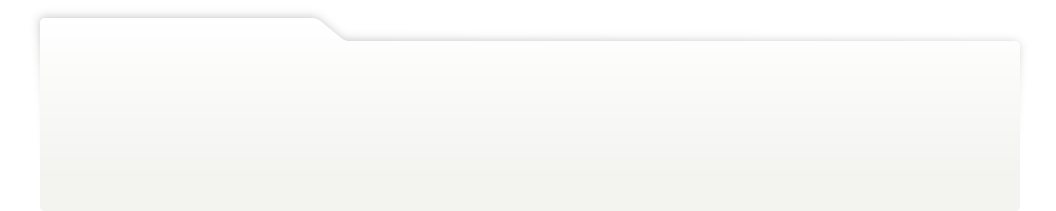
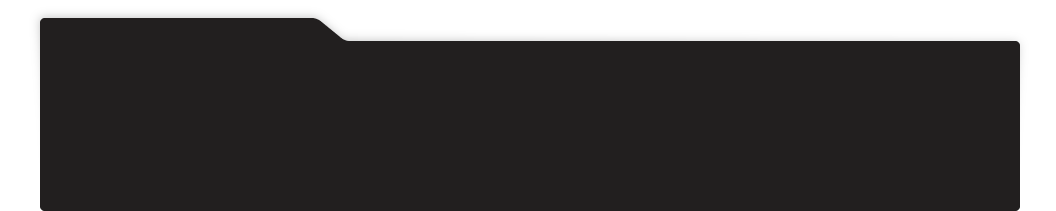
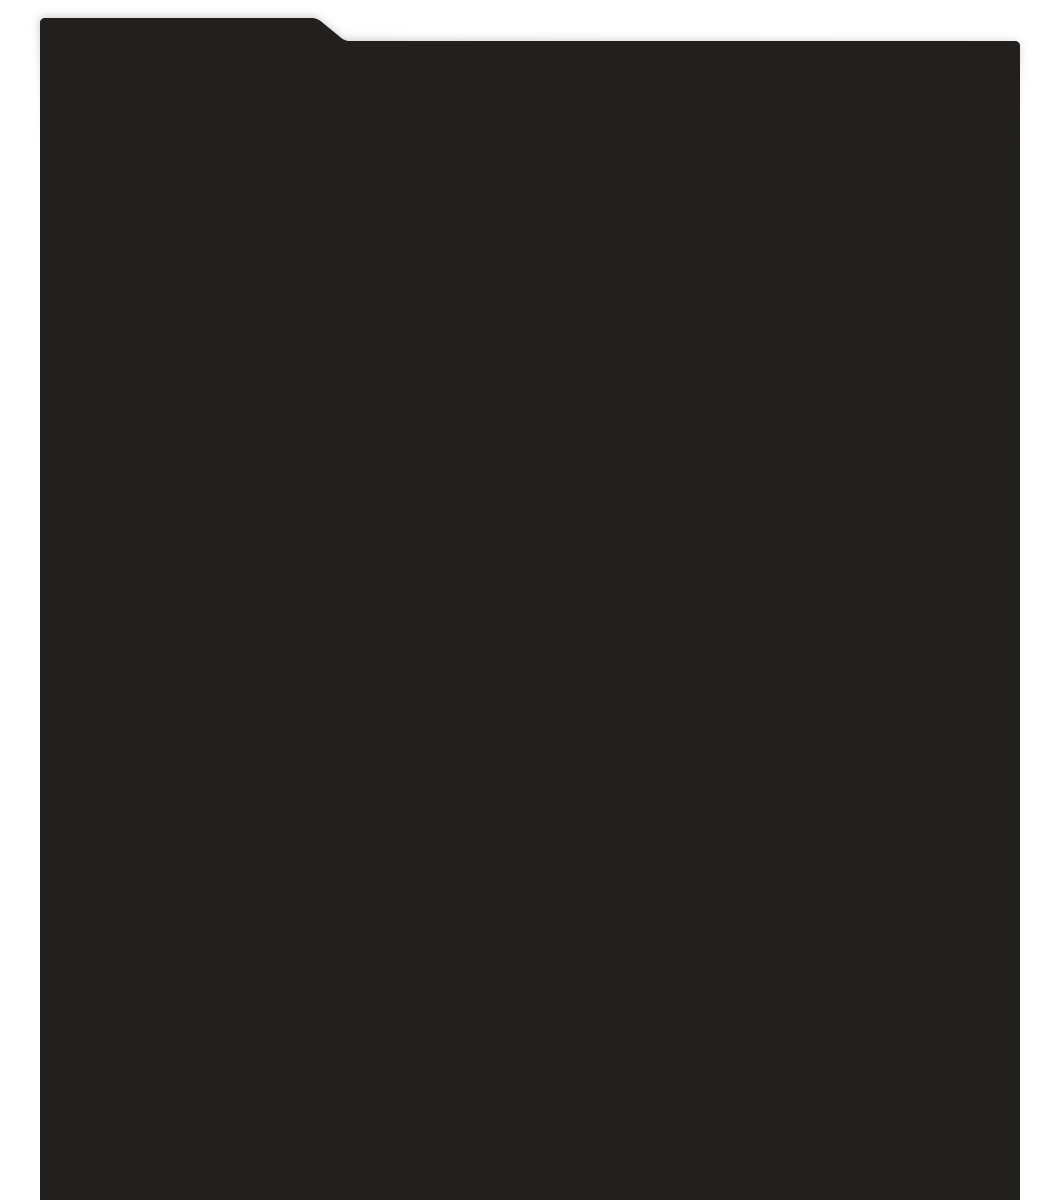
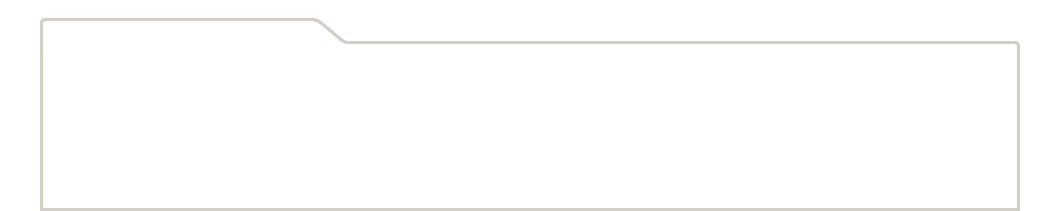
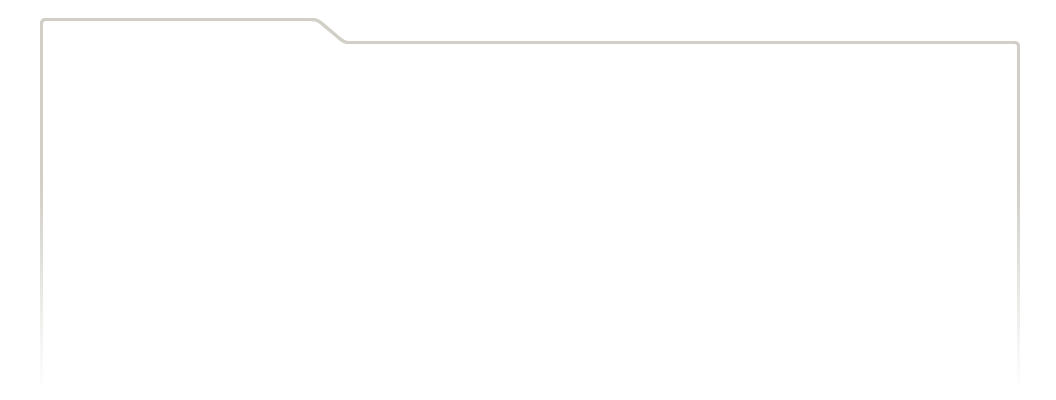
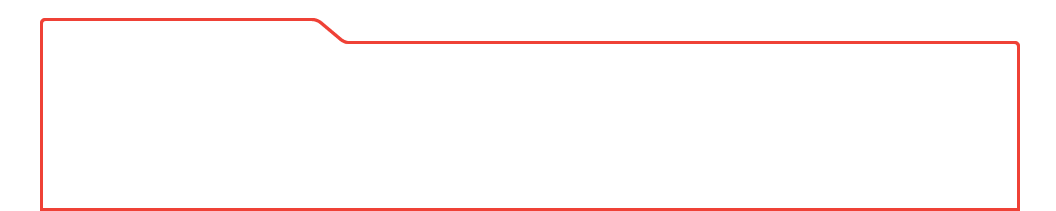
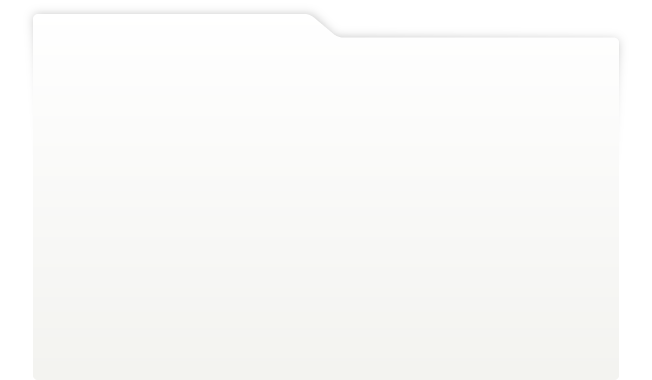
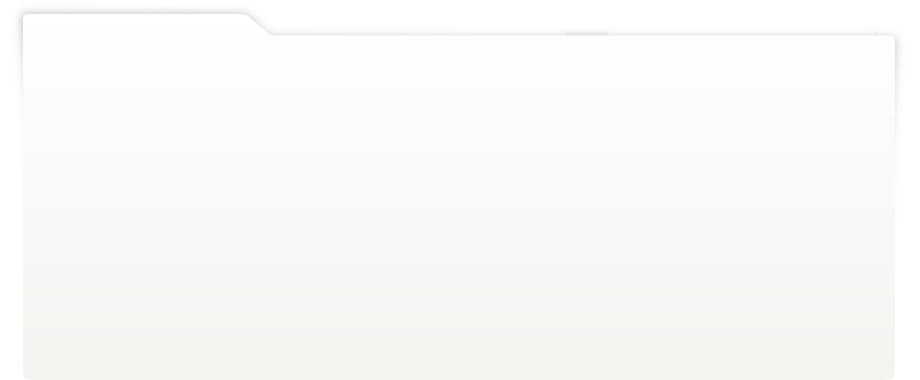
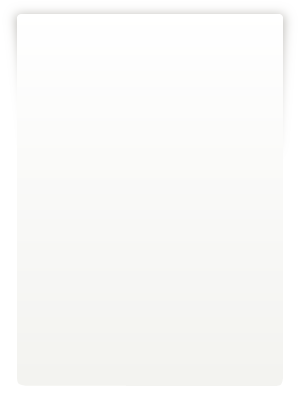
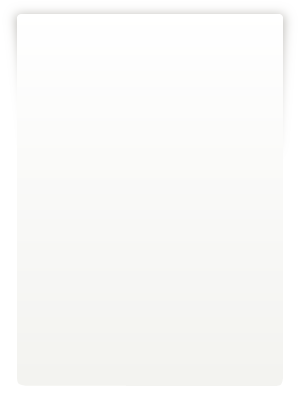
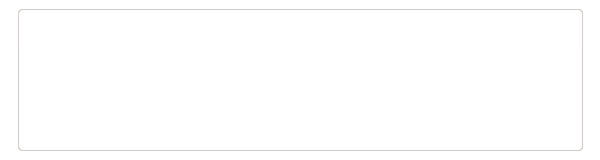
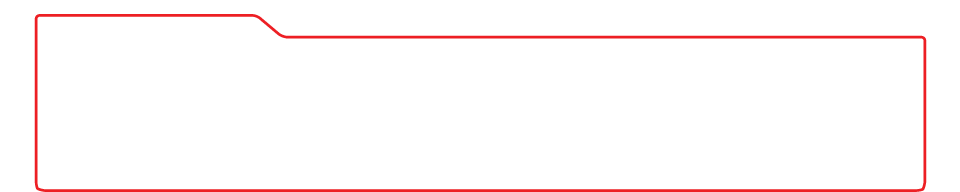
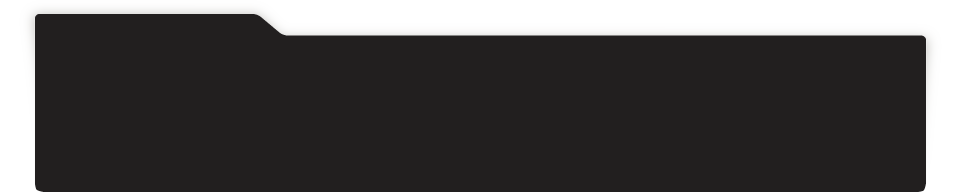
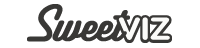
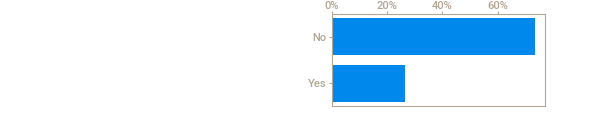
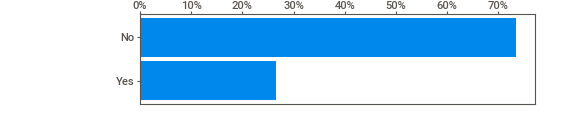
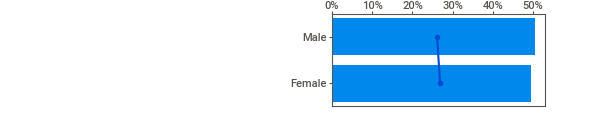
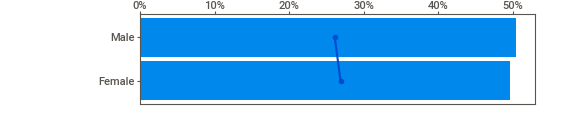
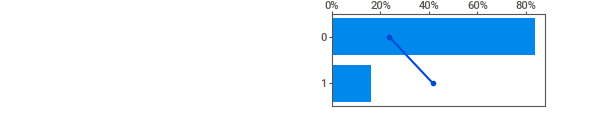
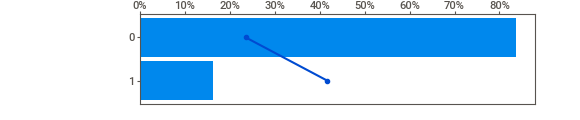
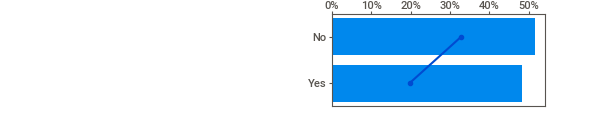
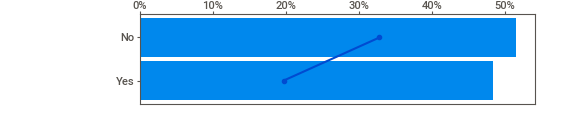
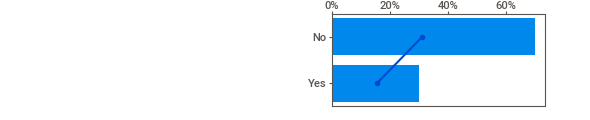
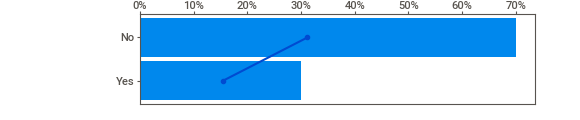
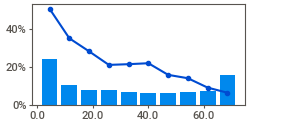
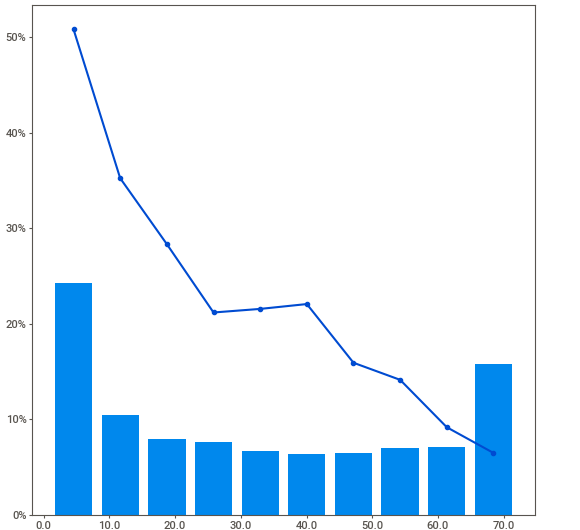
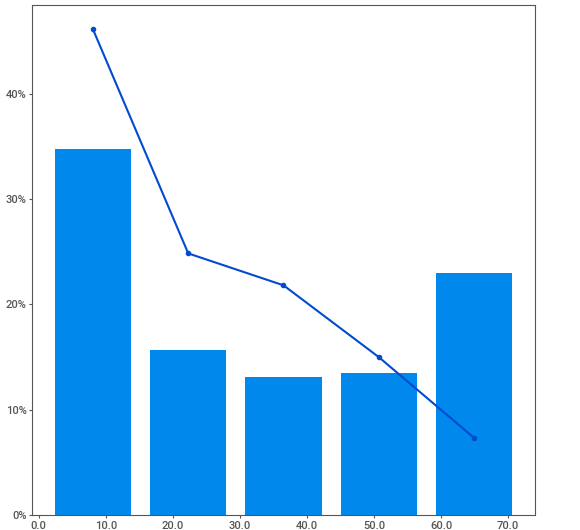
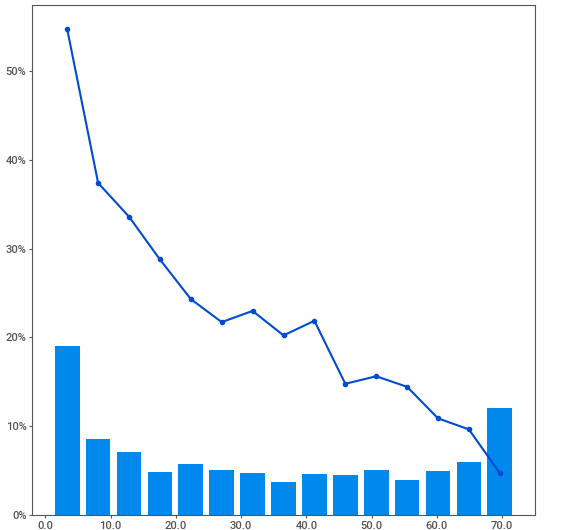
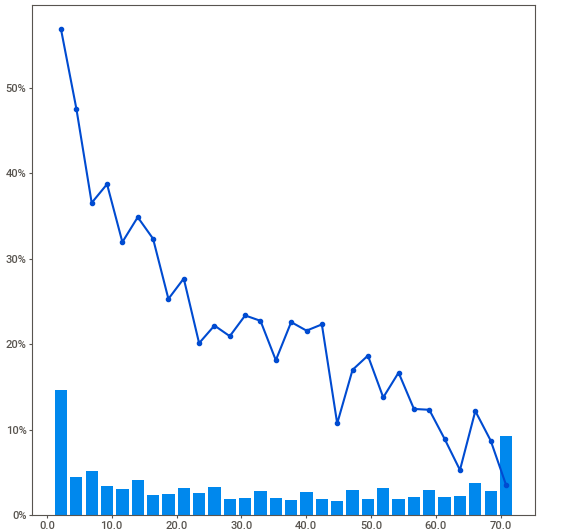
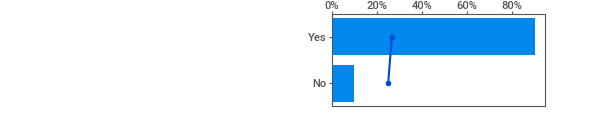
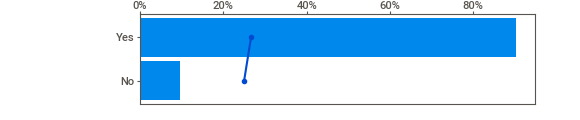
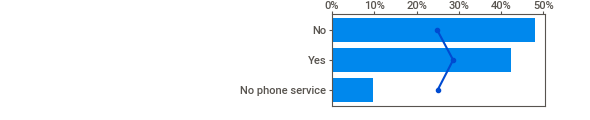
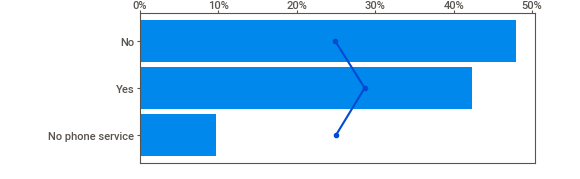
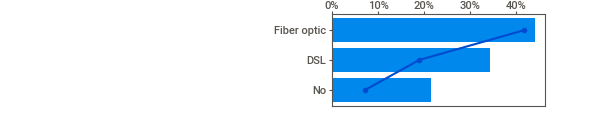
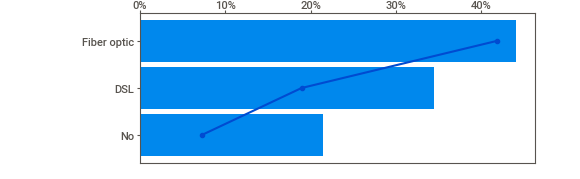
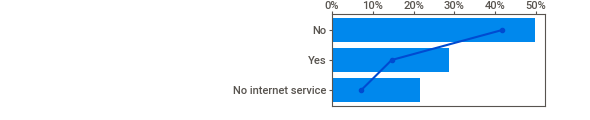
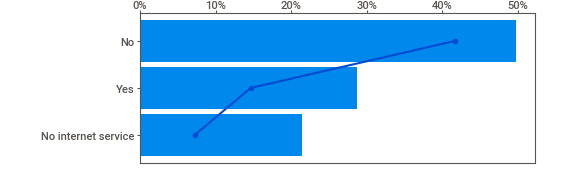
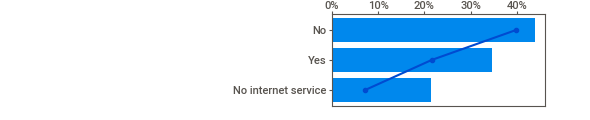
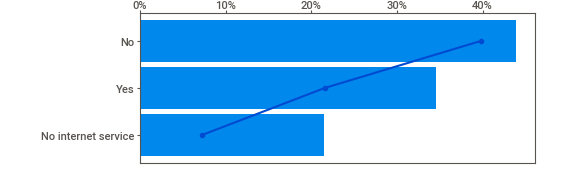
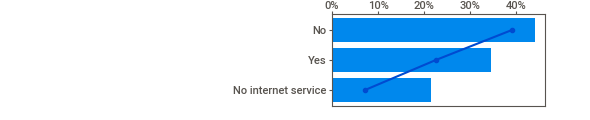
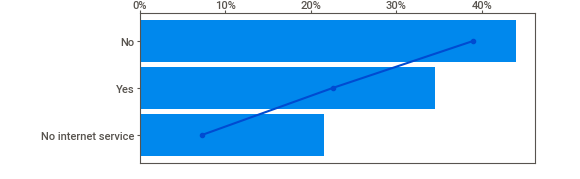
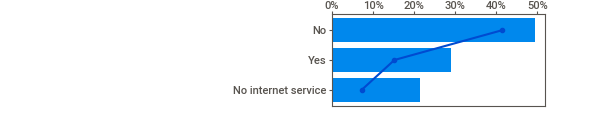
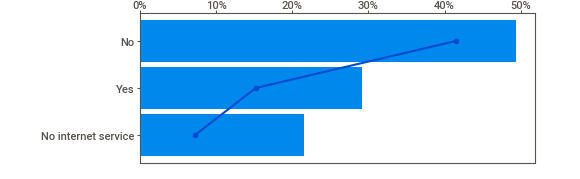
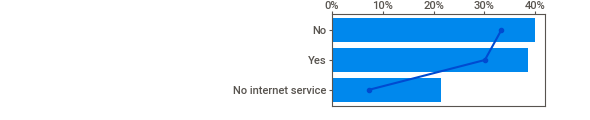
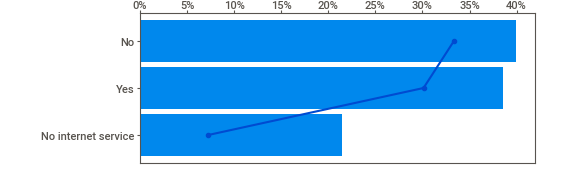
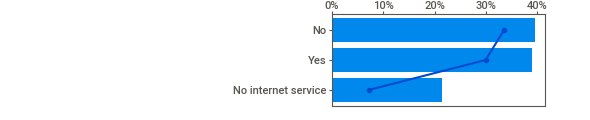
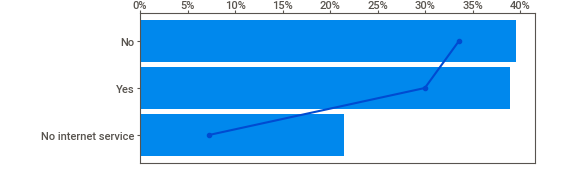
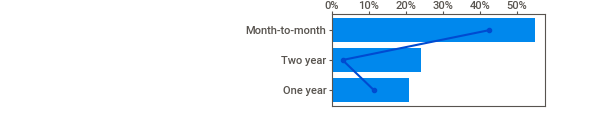
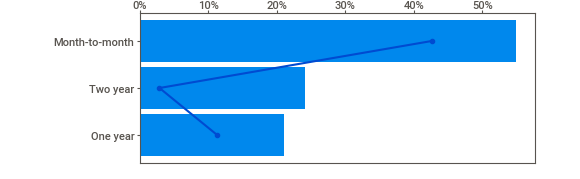
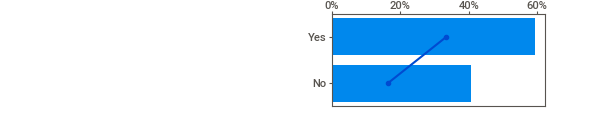
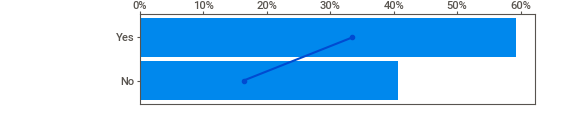
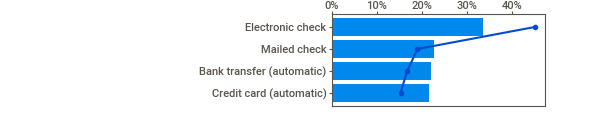
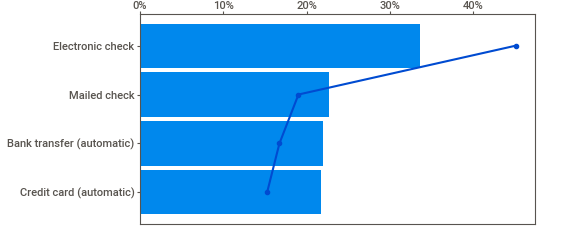
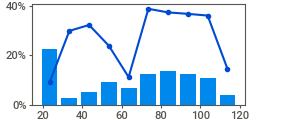
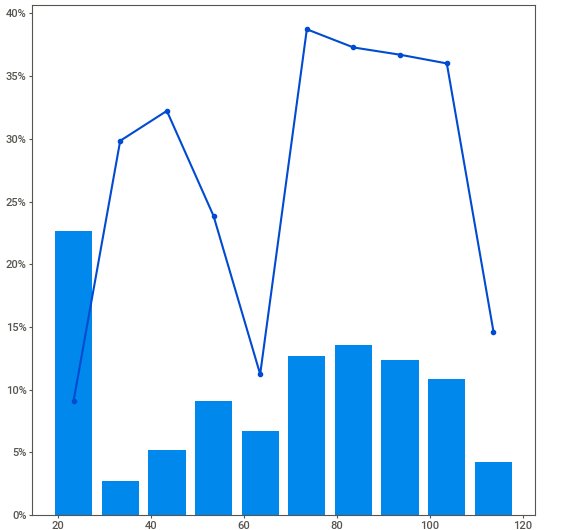
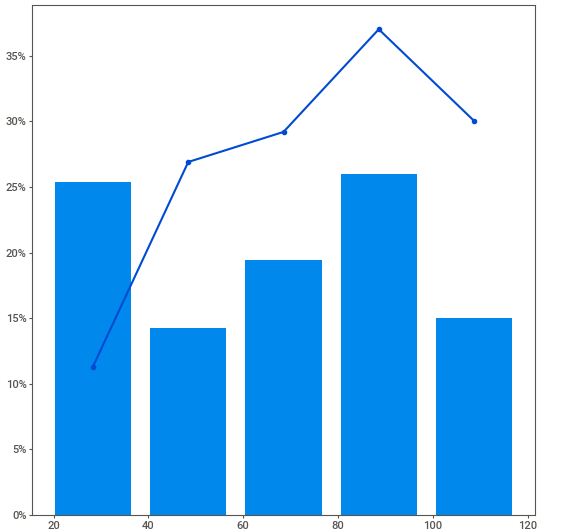
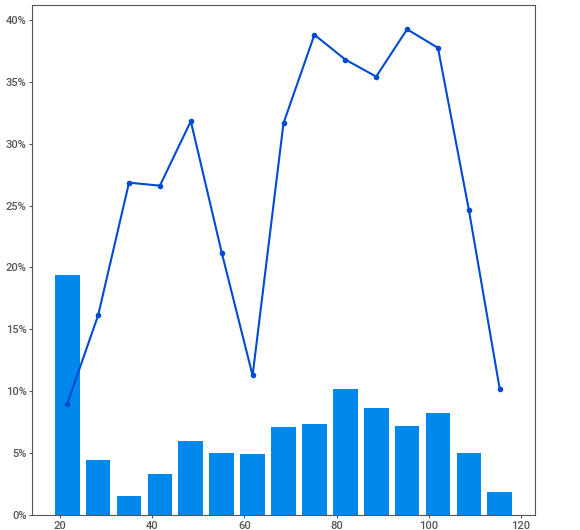
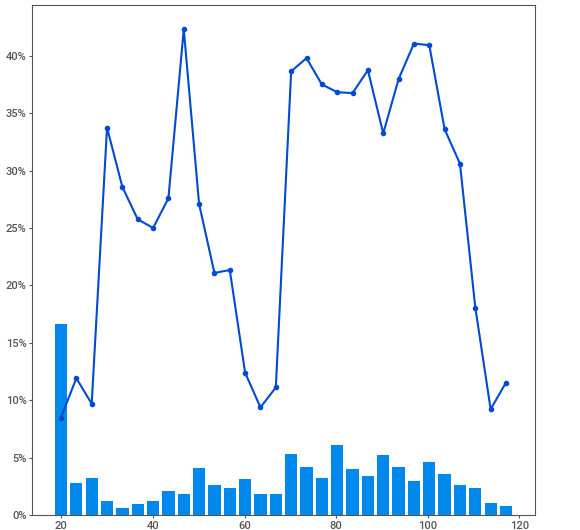
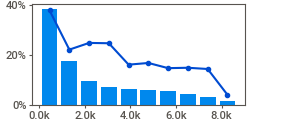
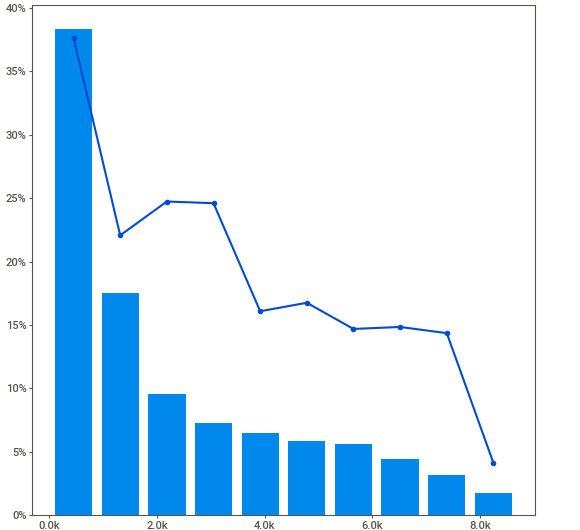
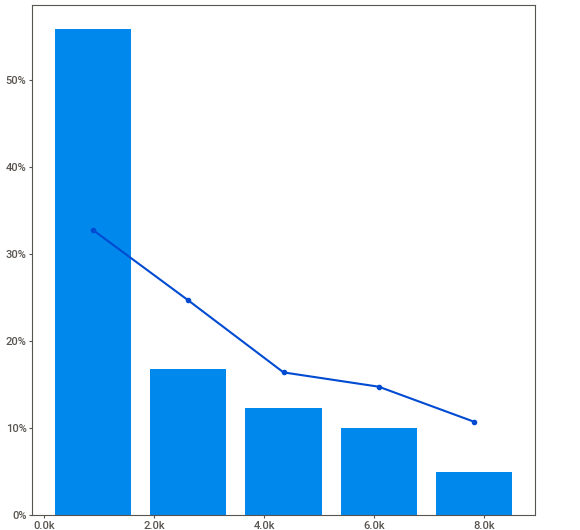
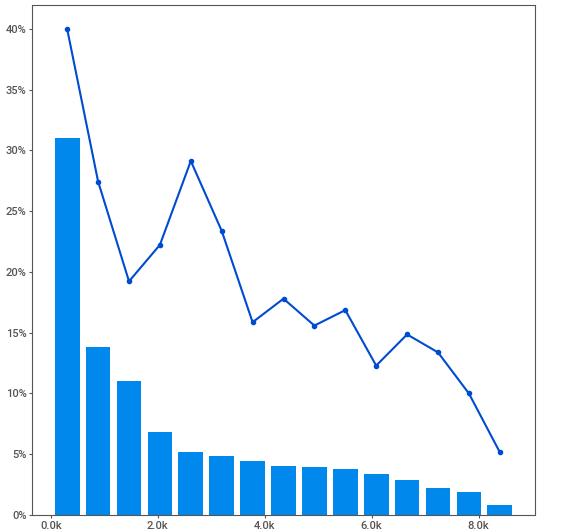
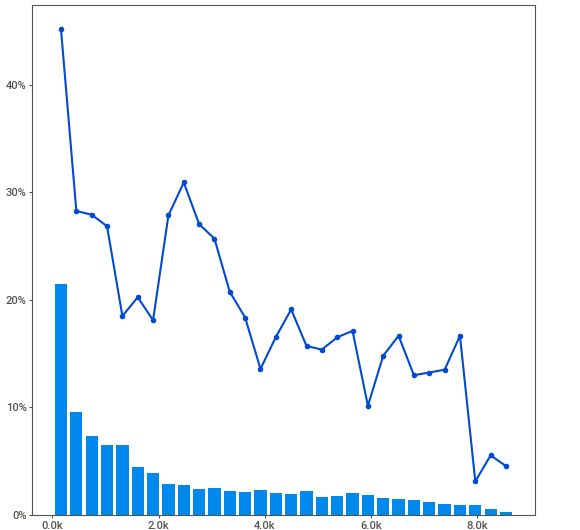
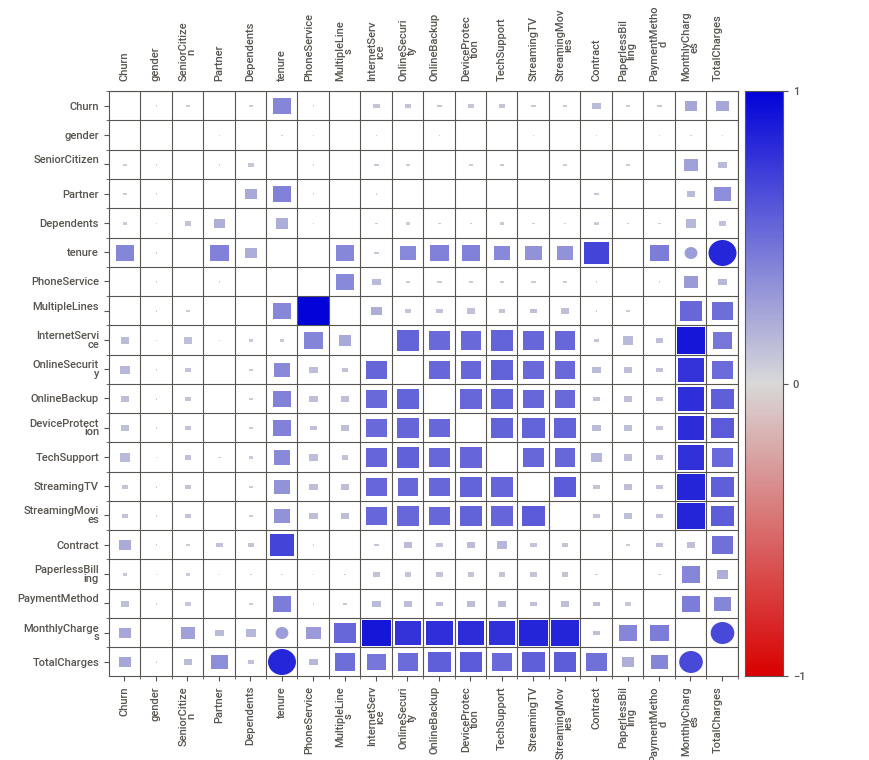
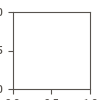

In [17]:
eda.show_notebook()

* Como na grande maioria dos conjuntos de dados sobre Churn, temos uma porcentagem muito maior de clientes que não deram Churn, do que os que deram. Isso torna difícil o aprendizado do modelo, pois facilmente ele pegará viés para os negativos, assim não conseguindo classificar os positivos
* A porcentagem de Churn é de 74% pra Não e 26% pra Sim

## Colocarei abaixo considerações sobre o EDA acima. Comentarei somente sobre os dados que me chamarem atenção, para que não fique muito longo

* SeniorCitizen: Se o cliente é idoso ou não. Me chamou atenção a disparidade entre Churns. Evidentemente, temos menos pessoas idosas, mas ainda assim, 42% dos clientes que eram idosos, deram Churn. A propoção foi quase o dobro, em relação ao público não idoso. Não é uma variável tão confiável, pois há muito mais clientes não idosos do que idosos, mas é de se pensar

* Partner: Se o cliente é casado ou não. Uma variável fortíssima para o aprendizado do nosso modelo. Temos uma proporção de 52-48 de usuários casados e não casados, o que é uma distribuição quase igual. Podemos ver, que mesmo a distribuição sendo bem próximo, temos 13% mais churns pra usuários não casados, do que casados

* Dependents: Se o cliente possui dependentes ou não. Mesmo exemplo do idoso, temos muito mais pessoas que não possuem dependentes do que as que possuem, entretanto, a porcentagem de Churn é praticamente 2x maior pros usuários que não possuem dependentes. De novo, há uma distribuição não igualitária, mas é de se pensar

* Tenure: Tempo do cliente com a empresa. Aqui nitidamente vemos um padrão: Quanto mais tempo de empresa, menos chance do cliente dar Churn

* InternetService: Se o cliente possui um serviço de internet e, se sim, qual o serviço. Podemos ver que usuários de fibra óptica possuem altas taxas de churn. O ideal seria alinhar com um time comercial da empresa, mas o meu palpite: Usuários que possuem fibra óptica são usuários extremamente ativos utilizando computadores / notebooks, o que, provavelmente, pode resultar nas possíveis taxas altas de churn

* Usuários que possuem internet, mas que não possuem os serviços ligados a ela, como: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, possuem um alto índice de Churn.

* TotalCharges: É o gasto total de contas do cliente na operadoraa. Quanto maior esse valor, menos Churn. O que nos confirma a afirmação que fizemos do Tenure. Tendo em vista que, quanto maior o valor, provavelmente, maior o tempo do cliente com a empresa

# Pré-processamento dos dados

In [18]:
df = df.rename(columns={'gender': 'Male'})
df.head()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Pegando as colunas que desejamos normalizar
columns_to_normalize = ['MonthlyCharges', 'TotalCharges']

# Instanciando o nosso MinMaxScaler
scaler = MinMaxScaler()

# Normalizando as colunas que desejamos
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [20]:
df = df.replace({'Churn': {'Yes': 1, 'No': 0}})
df = df.replace({'Male': {'Male': 1, 'Female': 0}, 'Partner': {'Yes': 1, 'No': 0}, 'Dependents': {'Yes': 1, 'No': 0}, 'PhoneService': {'Yes': 1, 'No': 0}, 'PaperlessBilling': {'Yes': 1, 'No': 0}})

/tmp/ipykernel_18/3634615121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Churn': {'Yes': 1, 'No': 0}})
/tmp/ipykernel_18/3634615121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': {'Male': 1, 'Female': 0}, 'Partner': {'Yes': 1, 'No': 0}, 'Dependents': {'Yes': 1, 'No': 0}, 'PhoneService': {'Yes': 1, 'No': 0}, 'PaperlessBilling': {'Yes': 1, 'No': 0}})


In [21]:
X = df.iloc[:,:-1]
y = df['Churn']

In [22]:
X.head()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0.115423,0.001275
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0.385075,0.215867
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,0.354229,0.010310
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0.239303,0.210241
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,0.521891,0.015330


In [23]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [24]:
colunas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']),
    remainder = 'passthrough',
    sparse_threshold = 0
    )

In [25]:
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes',
       

In [26]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__Male,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__MonthlyCharges,remainder__TotalCharges
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.115423,0.001275
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.385075,0.215867
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.354229,0.010310
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,0.0,0.0,0.239303,0.210241
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,24.0,1.0,1.0,0.662189,0.227521
7006,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.845274,0.847461
7007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,11.0,0.0,1.0,0.112935,0.037809
7008,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.558706,0.033210


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Treinamento dos modelos

## Primeiramente, treinaremos um modelo de Machine Learning, chamado RandomForestClassifier, e testaremos os resultados. Após isso, criaremos um modelo utilizando Rede neural e compararemos os resultados

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Faça previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.7837992013690815


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1289
           1       0.61      0.50      0.55       464

    accuracy                           0.78      1753
   macro avg       0.72      0.69      0.70      1753
weighted avg       0.77      0.78      0.78      1753



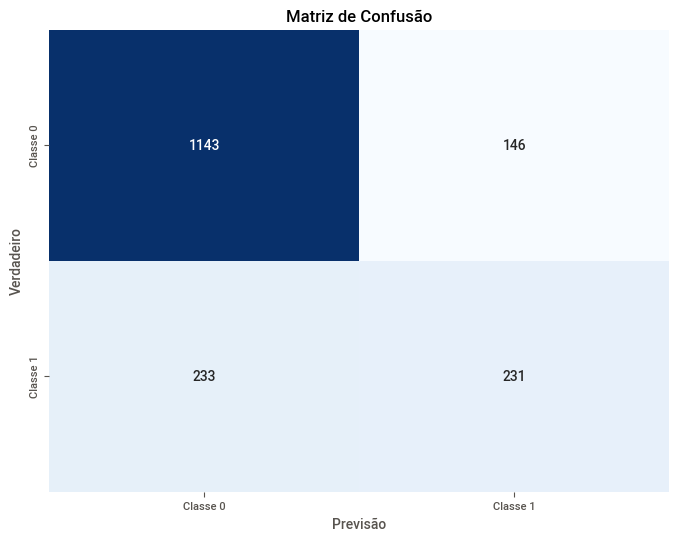

In [32]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

* O modelo de Machine Learning consegue dinstinguir facilmente os verdadeiros Negativos, usuários que não deram Churn e o modelo preveu que não dariam. Faz sentido que ele consiga distinguir melhor, tendo em vista que temos muito mais dados para usuários que não deram Churn, do que pra usuários que deram

### Pensando em uma empresa de telecomunicações, qual é o aspecto mais importante? Que o modelo preveja corretamente os usuários que darão churn ou os que não darão? Na minha visão, é muito mais crucial identificarmos os usuários que darão churn. Isso nos permite lançar campanhas que possam prolongar o período desses clientes conosco. Mesmo que haja margem para erros e ocasionalmente falhemos na previsão de casos positivos, impactando clientes que não dariam Churn como se fossem dar, se conseguirmos uma boa acurácia ao identificar os usuários propensos ao churn, podemos impactar esses clientes significativamente.

## Agora, realizaremos um teste utilizando uma ANN (Rede Neural Artificial)

In [33]:
input_dim = 40

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Definir a função para construir o modelo
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_shape=(40,)))  # Camada de entrada com 40 características
    model.add(Dense(units=16, activation='relu'))  # Primeira camada oculta
    model.add(Dense(units=1, activation='sigmoid'))  # Camada de saída para classificação binária

    # Definir hiperparâmetro para a taxa de aprendizado
    # Ajustar conforme necessário os limites e o método de amostragem ('LOG' para escala logarítmica)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compilar o modelo com otimizador Adam e a taxa de aprendizado ajustável
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Criar o tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=10,
    project_name='Churn model')

# Realizar a busca de hiperparâmetros
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Construir o melhor modelo com os melhores hiperparâmetros encontrados
model = tuner.hypermodel.build(best_hps)

# Treinar o modelo com os melhores hiperparâmetros
model.fit(X_train, y_train, epochs=20, batch_size=16)

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.7815173864364624

Best val_accuracy So Far: 0.804905891418457
Total elapsed time: 00h 00m 09s
Best learning rate: 0.01
Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7814 - loss: 0.4838
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4216
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8105 - loss: 0.4205
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4238
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 0.4254
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4050
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.4223
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8104 - loss: 0.4087
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.4065
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

In [35]:
y_pred_prob = model.predict(X_test)
threshold = 0.18
y_pred = (y_pred_prob > threshold).astype(int)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


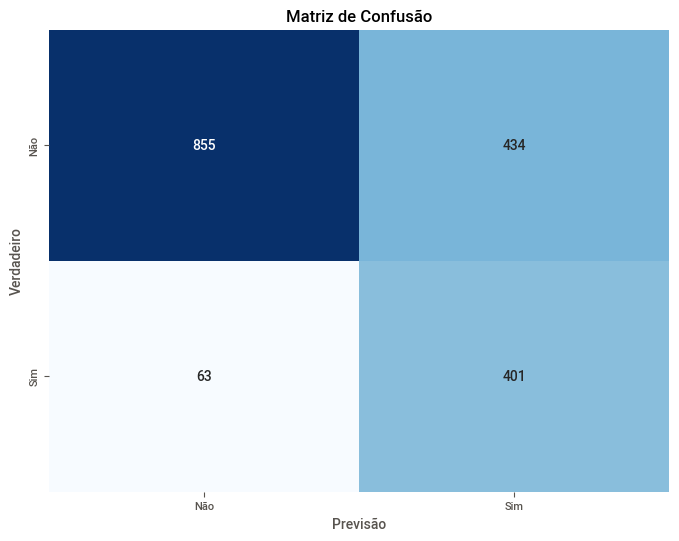

In [36]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Não', 'Sim'],
            yticklabels=['Não', 'Sim'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

* Com a Rede Neural, conseguimos impactar um número significativo de pessoas que dariam Churn. Isto nos custou uma certa acurácia em Falsos Positivos (Usuários que não dariam Churn, mas foram classificados como Sim). Quanto mais a rede aprendia e aumentava o número de Verdadeiros Positivos, o número de Falsos Positivos crescia junto

# Conclusão: 
## Com a Rede Neural Artificial, o modelo demonstrou maior robustez no processamento dos dados, permitindo uma compreensão mais profunda de nossos dados e a identificação da grande maioria dos clientes propensos ao churn. Por outro lado, isso resultou em um aumento significativo no número de Falsos Positivos.
## Na minha visão, isso não representa um problema, pois se conseguirmos impactar os clientes que estão propensos ao churn e prolongar o tempo de permanência deles conosco, isso não afetará de forma significativa os usuários que não dariam churn. 
## Em outras palavras, se o modelo prever erroneamente que alguns usuários que não dariam churn o farão, nossas campanhas de marketing não induzirão esses usuários a deixarem a empresa apenas por causa das campanhas. Além disso, ainda seremos capazes de impactar os clientes que estão realmente propensos ao churn.